<a href="https://colab.research.google.com/github/Adityakumarjha1997/Machine-Learning-Projects/blob/main/NLP_Classification_toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string
import seaborn as sns

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
w_vec = api.load('glove-twitter-100')


[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
w_vec.save('/content/vec.kv')

In [ ]:
from gensim.models import KeyedVectors
wrd_vec = KeyedVectors.load('/content/vec.kv')


In [ ]:
wrd_vec.similarity("apple", "grape")

0.42322594

In [ ]:
od.download('https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adityajha1997
Your Kaggle Key: ··········


100%|██████████| 2.55M/2.55M [00:00<00:00, 148MB/s]

In [ ]:
df = pd.read_csv('/content/twitter-airline-sentiment/Tweets.csv')

In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'i'}).sort_values(by = 'i', ascending = False)

,i
negativereason_gold,14608
airline_sentiment_gold,14600
tweet_coord,13621
negativereason,5462
user_timezone,4820
tweet_location,4733
negativereason_confidence,4118
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0


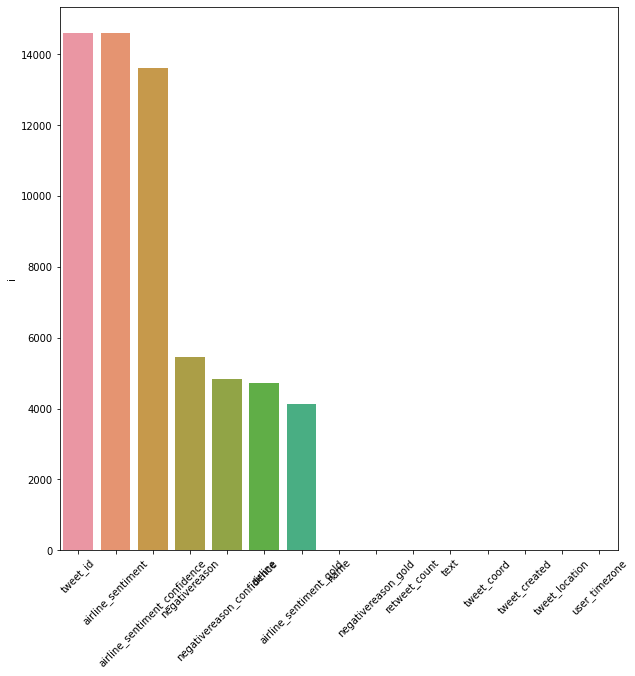

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 45)
sns.barplot(data = (pd.DataFrame(df.isna().sum()).rename(columns = {0:'i'}).sort_values(by = 'i', ascending = False)), x = (pd.DataFrame(df.isna().sum()).rename(columns = {0:'i'})).index, y= 'i')


In [ ]:
data = df[['airline_sentiment','text']]

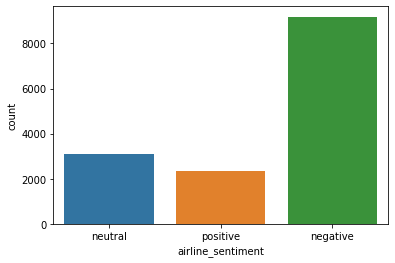

In [ ]:
sns.countplot(data = data, x = data.airline_sentiment)

In [ ]:
print(wrd_vec.most_similar(positive = ['woman','soldier'], negative =['man'], topn = 5))

[('wounded', 0.6441450119018555), ('soldiers', 0.6436513662338257), ('afghan', 0.6264792680740356), ('armed', 0.6237441897392273), ('military', 0.6087839007377625)]


In [ ]:
data.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [ ]:
def reg(sentiment):
  if sentiment == 'neutral':
    return 1
  elif sentiment == 'positive':
    return 2
  elif sentiment == 'negative':
    return 0

In [ ]:
data.airline_sentiment = data.airline_sentiment.apply(lambda x: reg(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
import re


In [ ]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

In [ ]:
def remove_username(text):
    return re.sub('@[^\s]+','',text)

In [ ]:
data.text = data.text.apply(lambda x: remove_username(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data

,airline_sentiment,text
0,1,What said.
1,2,plus you've added commercials to the experien...
2,1,I didn't today... Must mean I need to take an...
3,0,"it's really aggressive to blast obnoxious ""en..."
4,0,and it's a really big bad thing about it
...,...,...
14635,2,thank you we got on a different flight to Chi...
14636,0,leaving over 20 minutes Late Flight. No warni...
14637,1,Please bring American Airlines to #BlackBerry10
14638,0,"you have my money, you change my flight, and ..."


In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'together', 'against', 'full', 'therefore', 'am', 'mine', 'someone', 'nothing', 'have', 'meanwhile', 'became', 'over', '’ll', 'made', 'twenty', 'any', 'become', 'few', 'off', 'further', 'behind', 'thus', 'may', 'you', '‘s', 'he', 'former', 'yourself', 'back', 'nowhere', 'twelve', 'down', "'ve", 'eleven', 'really', 'n’t', 'around', 'although', 'always', 'out', "'s", 'anyone', 'sometime', "'re", 'anywhere', 'never', 'of', 'cannot', 'top', 'for', 'here', 'anyway', '‘re', 'both', 'five', 'several', 'we', 'who', 'ca', 'neither', 'per', 'our', 'with', 'another', 'thereupon', 'next', 'through', 'whose', 'in', 'many', 'somehow', 'due', 'are', 'enough', 'from', 'him', 'them', 'beyond', 'since', 'please', 'beside', 'everything', 'either', 'still', 'quite', 'how', 'much', 'their', 'being', 'though', "'m", 'beforehand', 'hereafter', 'name', 'herself', 'than', 'becomes', 'others', 'go', 'onto', 'must', 'even', 'between', 'whereupon', 'without', 'elsewhere', 'front', '’m', 'throughout', 'very', 'i'

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
def sent_vec(sent):
    vector_size = wrd_vec.vector_size
    wv_res = np.zeros(vector_size)
    #print(wv_res)
    ctr = 1
    for w in sent:
        if w in wrd_vec:
            ctr += 1
            wv_res += wrd_vec[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
data.text = data.text.apply(spacy_tokenizer)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data

,airline_sentiment,text
0,1,[]
1,2,"[plus, add, commercial, experience, ..., tacky]"
2,1,"[today, ..., mean, need, trip]"
3,0,"[aggressive, blast, obnoxious, entertainment, ..."
4,0,"[big, bad, thing]"
...,...,...
14635,2,"[thank, different, flight, chicago]"
14636,0,"[leave, 20, minute, late, flight, warning, com..."
14637,1,"[bring, american, airlines, blackberry10]"
14638,0,"[money, change, flight, answer, phone, suggest..."


In [ ]:
data['vec'] = data['text'].apply(sent_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data

,airline_sentiment,text,vec
0,1,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,"[plus, add, commercial, experience, ..., tacky]","[0.11846333462744951, -0.11303332696358363, -0..."
2,1,"[today, ..., mean, need, trip]","[-0.03476259969174862, 0.06763320565223693, -0..."
3,0,"[aggressive, blast, obnoxious, entertainment, ...","[0.1670540004968643, 0.04421141566708684, -0.1..."
4,0,"[big, bad, thing]","[0.20109249651432037, -0.18873000144958496, 0...."
...,...,...,...
14635,2,"[thank, different, flight, chicago]","[0.1902042031288147, 0.2570180058479309, -0.13..."
14636,0,"[leave, 20, minute, late, flight, warning, com...","[0.201729233448322, 0.24696677149488375, 0.146..."
14637,1,"[bring, american, airlines, blackberry10]","[-0.02551050065085292, 0.17316750437021255, 0...."
14638,0,"[money, change, flight, answer, phone, suggest...","[0.22075150115415454, 0.18234487855806947, -0...."


In [ ]:
x = data['vec'].to_list()
y = data['airline_sentiment'].to_list()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)


array([2, 2, 0, ..., 0, 1, 1])

In [ ]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))



Logistic Regression Accuracy: 0.7486338797814208


In [ ]:
pd.DataFrame({'one': 34, 'two': 25})

ValueError: ignored

In [ ]:
lists = [[{'one': 34, 'two': 25}, {'nine': 54}],[{'ldg': 34, 'hjf': 25}],[{'fd': 652, 'ergh': 7},{'hydf': 251, 'uk': 2},{'one': 26, 'twsdfo': 63}]]

In [ ]:
a = {}

In [ ]:
def fun(input):
  try:
    a = {}
    for b in input:
      for i in b:
        a.update(i)
    opf = [a]
    output = pd.DataFrame(opf).transpose().rename(columns = {0 : 'Values'}).sort_values(by = 'Values', ascending = False)
    print('Applicatint is using list of lists in the input')
  except:
    print('Applicatint is not using list of lists in the input')

  return output


In [ ]:
fun(lists)

Applicatint is using list of lists in the input


,Values
fd,652
hydf,251
twsdfo,63
nine,54
ldg,34
one,26
two,25
hjf,25
ergh,7
uk,2


In [ ]:
exp = [{'one': 34, 'two': 25 ,'nine': 54, 'ldg': 34, 'hjf': 25, 'fd': 652, 'ergh': 7, 'hydf': 251, 'uk': 2,'one': 26, 'twsdfo': 63}]

In [ ]:
def fun(input):
  
  


In [ ]:
fun(exp)

,Values
fd,652
hydf,251
twsdfo,63
nine,54
ldg,34
one,26
two,25
hjf,25
ergh,7
uk,2
